# 1. กําหนดสัญญาณแบบ orthogonal ดังภาพที่ 1 และฟังก์ชันพื้นฐานสําหรับชุดสัญญาณนี้ ดังภาพที่ 2 เพื่อส่งข้อมูลผ่านช่องสัญญาณ

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import correlate

A.653040629-9, 653040699-7 then sum of last to digit is 99 + 97
B.find parameter x0 with 653040629-9 and 653040699-7 modulo by 100.

In [239]:
def findParameter(student1, student2):
    return (student1 + student2) % 100 # (student1 + student2) mod by 100

In [240]:
x = []
x0 = findParameter(99, 97) # result is 96
x1 = 7 # from document define x1 = 7

C.find parameter x[n], n is member of (1, 2, 3, ... n)

In [241]:
def findX():
    x.append(x0)
    x.append(x1)
    for i in range(1,5):
        x_temp = (((3 * x[i]) + (2 * x[i-1])) % 19 ) + 2
        x.append(x_temp)

In [242]:
findX()
for i in range(0,5):
    print(f"x{i}: {x[i]}")

x0: 96
x1: 7
x2: 6
x3: 15
x4: 2


In [243]:
ln_2x3 = np.log(2 * x[3])
T1 = ln_2x3 / 4
T2 = ln_2x3 / 2
T3 = 3 * ln_2x3 / 4
A = 2 * np.log(x[2])
B = 2 / np.sqrt(ln_2x3)

สร้างช่วงเวลา (0 ถึง T3)

In [244]:
t = np.linspace(0, T3, 1000)
dt = t[1] - t[0]

สร้างสัญญาณ s1, s2, s3 (เป็น pulse rectangular ที่มีค่า A ในช่วงที่กำหนด)

In [245]:
s1 = np.where((t >= 0) & (t <= T1), A, 0)
s2 = np.where((t >= T1) & (t <= T2), A, 0)
s3 = np.where((t >= T2) & (t <= T3), A, 0)

In [ ]:
print(s1)
print(s2)
print(s2)

สร้างฟังก์ชันพื้นฐาน ψ1, ψ2, ψ3 ตามช่วงเวลา

In [246]:
psi1 = np.where((t >= 0) & (t <= T1), B, 0)
psi2 = np.where((t >= T1) & (t <= T2), B, 0)
psi3 = np.where((t >= T2) & (t <= T3), B, 0)

คำนวณ impulse response ของ matched filters โดยใช้ time-reversal ของ ψ

In [247]:
h1 = psi1[::-1]
h2 = psi2[::-1]
h3 = psi3[::-1]

คำนวณ output ของ matched filters โดยใช้ convolution (โหมด 'full')

In [248]:
y1_full = correlate(s1, h1, mode='full') * dt
y2_full = correlate(s2, h2, mode='full') * dt
y3_full = correlate(s3, h3, mode='full') * dt

กำหนดแกนเวลาใหม่สำหรับผลลัพธ์ convolution แบบ full

In [249]:
t_full = np.linspace(0, 2 * T3, len(y1_full))

"สลับด้าน" โดยกลับค่าผลลัพธ์ (mirror) จากขวาไปซ้าย

In [250]:
y1_flipped = y1_full[::-1]
y2_flipped = y2_full[::-1]
y3_flipped = y3_full[::-1]

พลอตกราฟ h1

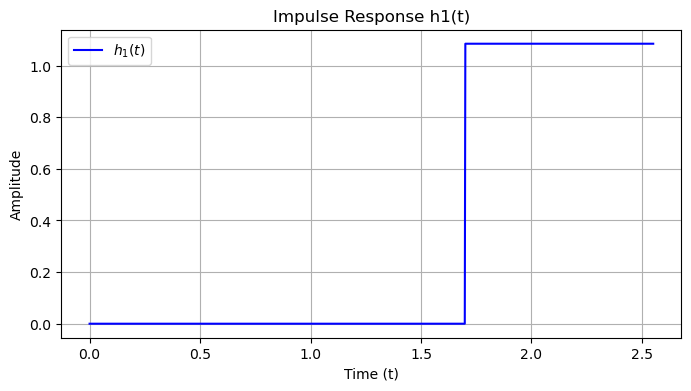

In [251]:
plt.figure(figsize=(8, 4))
plt.plot(t, h1, label=r'$h_1(t)$', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('Impulse Response h1(t)')
plt.legend()
plt.grid(True)
plt.show()

พลอตกราฟ h2

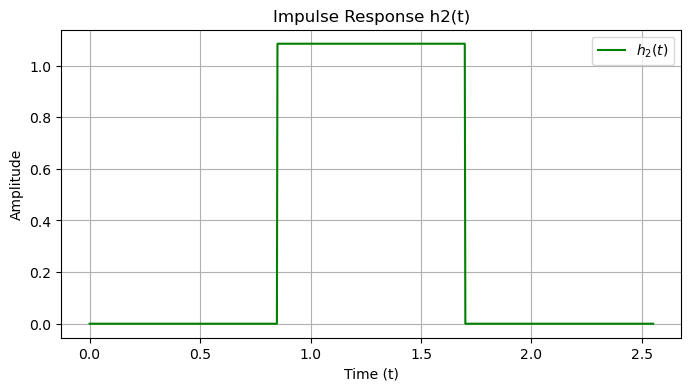

In [252]:
plt.figure(figsize=(8, 4))
plt.plot(t, h2, label=r'$h_2(t)$', color='green')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('Impulse Response h2(t)')
plt.legend()
plt.grid(True)
plt.show()

พลอตกราฟ h3

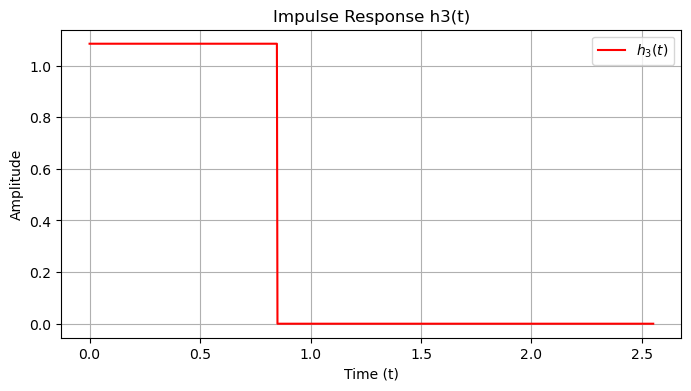

In [253]:
plt.figure(figsize=(8, 4))
plt.plot(t, h3, label=r'$h_3(t)$', color='red')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('Impulse Response h3(t)')
plt.legend()
plt.grid(True)
plt.show()

ลอตกราฟแสดงผลลัพธ์ที่สลับด้านสำหรับ s1(t)

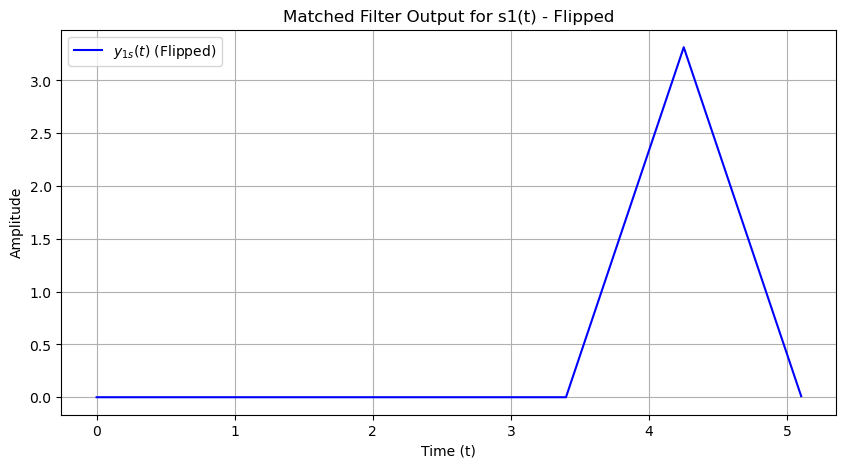

In [254]:
plt.figure(figsize=(10, 5))
plt.plot(t_full, y1_flipped, label=r'$y_{1s}(t)$ (Flipped)', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('Matched Filter Output for s1(t) - Flipped')
plt.legend()
plt.grid(True)
plt.show()

พลอตกราฟสำหรับ s2(t)

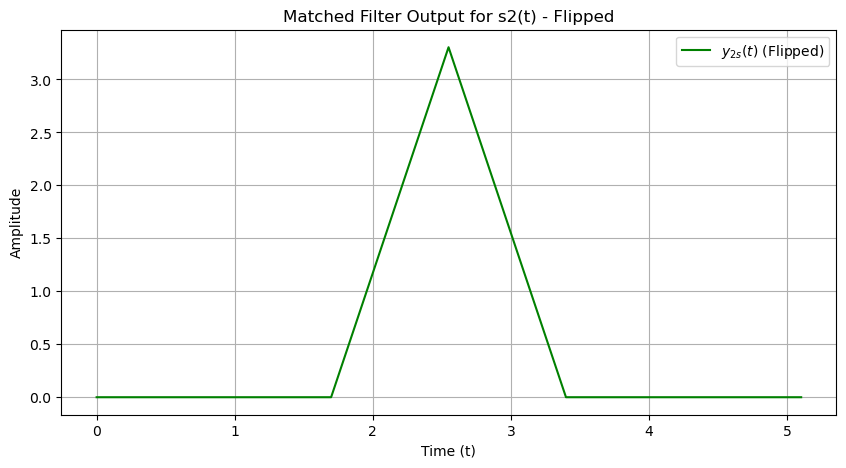

In [255]:
plt.figure(figsize=(10, 5))
plt.plot(t_full, y2_flipped, label=r'$y_{2s}(t)$ (Flipped)', color='green')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('Matched Filter Output for s2(t) - Flipped')
plt.legend()
plt.grid(True)
plt.show()

พลอตกราฟสำหรับ s3(t)

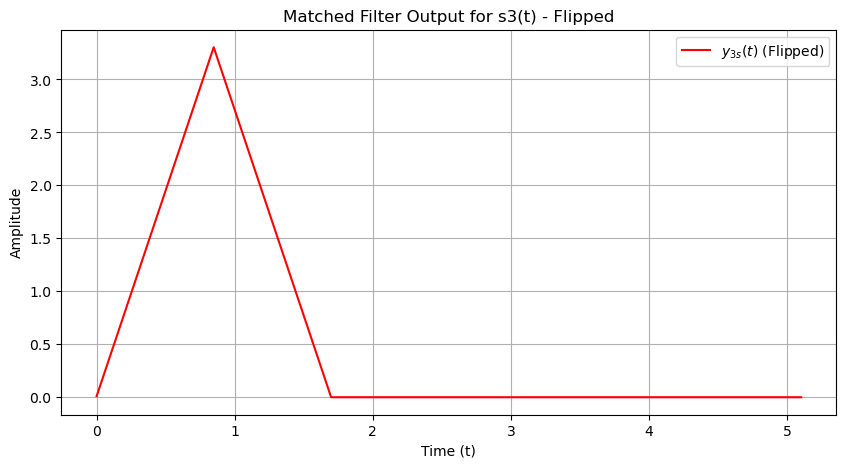

In [256]:
plt.figure(figsize=(10, 5))
plt.plot(t_full, y3_flipped, label=r'$y_{3s}(t)$ (Flipped)', color='red')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('Matched Filter Output for s3(t) - Flipped')
plt.legend()
plt.grid(True)
plt.show()

D
คำนวณค่า y1s(ln(2x3)), y2s(ln(2x3)), y3s(ln(2x3))

In [257]:
def matched_filter_output(t):
    if 0 <= t < T2:
        return (4 * A / np.sqrt(ln_2x3)) * (t / (ln_2x3 / 4))
    elif T2 <= t <= T3:
        return (4 * A / np.sqrt(ln_2x3)) * (1 - (t - T2) / (ln_2x3 / 4))
    else:
        return 
y1_val = matched_filter_output(ln_2x3)
y2_val = matched_filter_output(ln_2x3 - T1)
y3_val = matched_filter_output(ln_2x3 - T2)

# แสดงเวกเตอร์ r
r = np.array([y1_val, y2_val, y3_val])
print("Vector r at t = ln(2x3):")
print(r)

Vector r at t = ln(2x3):
[None 8.629070299137315e-16 7.772375556749726]


Given values from matched filter output